In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv(r"C:\Users\admin\Desktop\DATN\data\imdb-movies-dataset.csv")

In [8]:
df.shape

(6415, 11)

In [9]:
df.head()

,Poster,Title,Year,Certificate,Genre,Rating,Metascore,Director,Cast,Votes,Description
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an..."
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t..."


In [10]:
df.columns

Index(['Poster', 'Title', 'Year', 'Certificate', 'Genre', 'Rating',
       'Metascore', 'Director', 'Cast', 'Votes', 'Description'],
      dtype='object')

In [11]:
df.dtypes

Poster          object
Title           object
Year           float64
Certificate     object
Genre           object
Rating         float64
Metascore      float64
Director        object
Cast            object
Votes           object
Description     object
dtype: object

In [12]:
df.describe()

,Year,Rating,Metascore
count,6415.000000,6415.000000,6415.000000
mean,2006.287763,6.549135,57.384256
std,18.277163,0.937938,17.630567
min,1929.000000,1.900000,1.000000
25%,1997.000000,6.000000,45.000000
50%,2012.000000,6.600000,58.000000
75%,2021.000000,7.200000,70.000000
max,2025.000000,9.300000,100.000000


# Data preparation

In [14]:
# subset df
movies = df[[#'Poster', 
        'Title', 'Year', 'Certificate', 'Genre',
        'Rating', 'Metascore', 
        'Director', 'Cast','Votes', 
        'Description'
        ]].copy()

In [15]:
movies.shape

(6415, 10)

In [16]:
movies.head()

,Title,Year,Certificate,Genre,Rating,Metascore,Director,Cast,Votes,Description
0,The Idea of You,2023.0,R,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un..."
1,Kingdom of the Planet of the Apes,2023.0,PG-13,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ..."
2,Unfrosted,2023.0,PG-13,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an..."
3,The Fall Guy,2023.0,PG-13,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...
4,Challengers,2023.0,R,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t..."


In [17]:
# checking for missing values
movies.isna().sum()

Title          0
Year           0
Certificate    0
Genre          0
Rating         0
Metascore      0
Director       0
Cast           1
Votes          0
Description    0
dtype: int64

In [18]:
# filling missing values
movies['Cast'] = movies['Cast'].fillna(movies['Cast'].mode()[0])

In [19]:
# checking dtypes
movies.dtypes

Title           object
Year           float64
Certificate     object
Genre           object
Rating         float64
Metascore      float64
Director        object
Cast            object
Votes           object
Description     object
dtype: object

In [20]:
#  changing dtypes
movies['Year'] = movies['Year'].astype(int)

# Feature understanding (univariate)

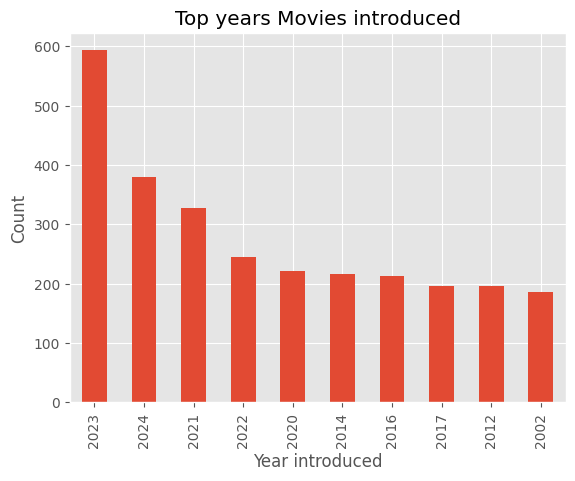

In [21]:
# plotting top years when movies were introduced
ax = movies['Year'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top years Movies introduced')
ax.set_xlabel('Year introduced')
ax.set_ylabel('Count')
plt.show()

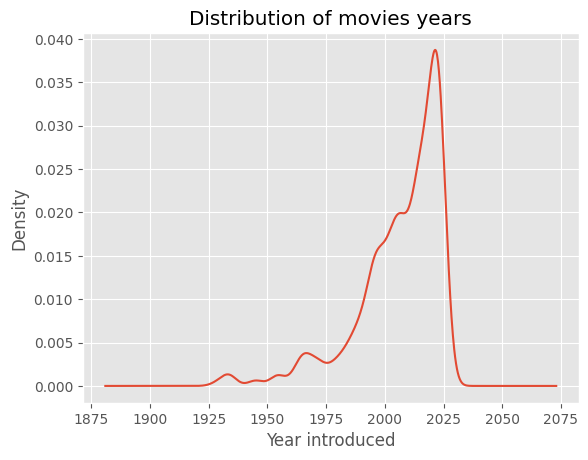

In [23]:
# plotting the distribution of movie years 
ax = movies['Year'].plot(kind='kde', title='Distribution of movies years')
ax.set_xlabel('Year introduced')
plt.show()

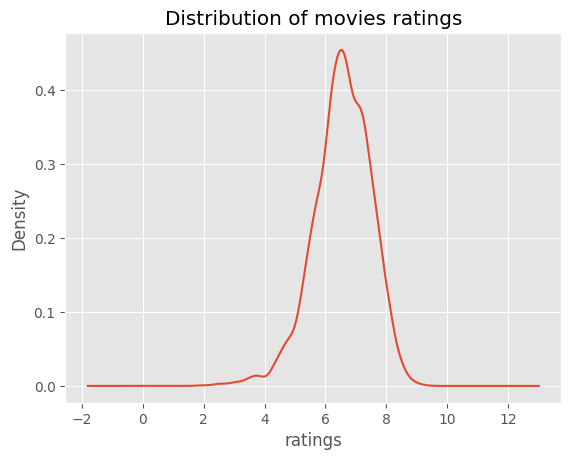

In [24]:
# plotting the distribution of movies ratings
ax = movies['Rating'].plot(kind='kde', title='Distribution of movies ratings')
ax.set_xlabel('ratings')
plt.show()

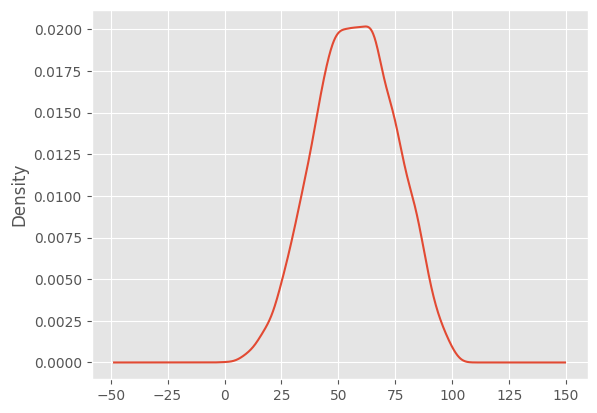

In [25]:
# plotting the distribution of movies metascore
ax = movies['Metascore'].plot(kind='kde')
plt.show()

# Feature understanding (multivariate)

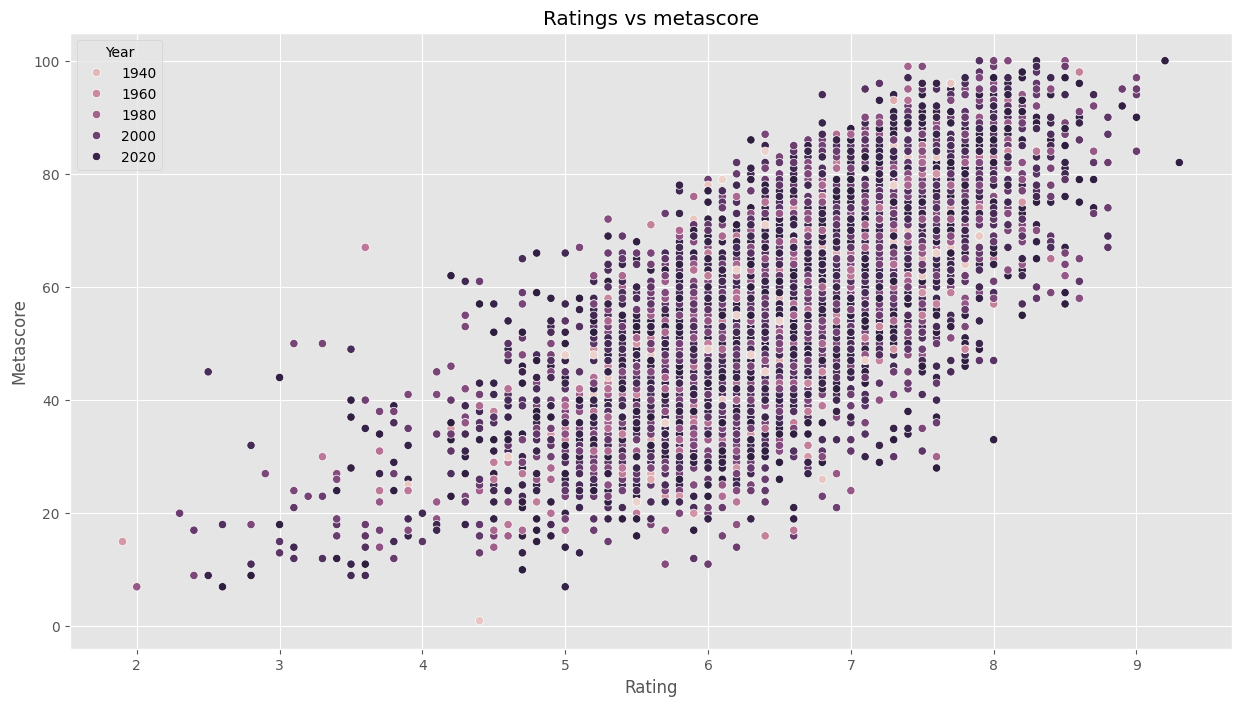

In [26]:
# plotting distribution of ratings vs metascore
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='Rating', y='Metascore', data=movies, hue='Year')
ax.set(title='Ratings vs metascore')
plt.show()

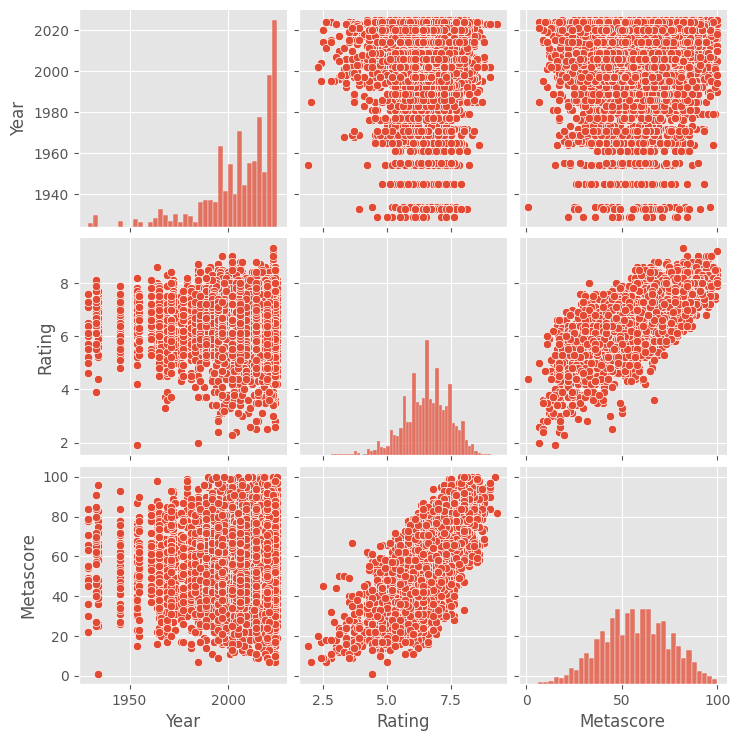

In [27]:
# plotting the distribution of every feature
ax = sns.pairplot(movies, vars=['Year', 'Rating', 'Metascore'])
plt.show()

In [28]:
# correlation between features
movies_corr = movies[['Year', 'Rating', 'Metascore']].corr()
movies_corr

,Year,Rating,Metascore
Year,1.000000,0.022526,0.026224
Rating,0.022526,1.000000,0.729466
Metascore,0.026224,0.729466,1.000000


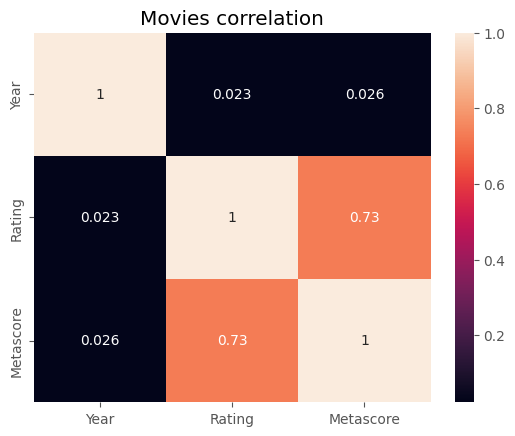

In [30]:
# plotting movies correlation
ax = sns.heatmap(movies_corr, annot=True)
ax.set(title='Movies correlation')
plt.show()

In [32]:
# import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
# looking the data
movies['Description'].head(5)

0    Solène, a 40-year-old single mom, begins an un...
1    Many years after the reign of Caesar, a young ...
2    In 1963 Michigan, business rivals Kellogg's an...
3    A down-and-out stuntman must find the missing ...
4    Tashi, a former tennis prodigy turned coach, t...
Name: Description, dtype: object

In [35]:
# remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

# replace NaN with an empty
movies['Description'] = movies['Description'].fillna('')

# TF_IDF matrix fitting and transforming the data
tfiff_matrix = tfidf.fit_transform(movies['Description'])

# output the shape of tfidf_matrix
tfiff_matrix.shape

(6415, 15593)

In [36]:
# import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

In [37]:
# compute the cosine similarity matrix
cosine_sim = linear_kernel(tfiff_matrix, tfiff_matrix)

In [38]:
# construct a reverse map of indices and movie titles
indices = pd.Series(movies.index, index=movies['Title']).drop_duplicates()

In [40]:
def get_recommendations(title, cosine_sim=cosine_sim):
    
    # get the index of the movie that matches the title
    idx = indices[title]
    
    # get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    # get the movies indices
    movie_indices = [i[0] for i in sim_scores]
    
    #return the top 10 most similar movies
    return movies['Title'].iloc[movie_indices]

In [41]:
get_recommendations('Spider-Man')

570                The Amazing Spider-Man
563     Spider-Man: Into the Spider-Verse
177               Spider-Man: No Way Home
464                                 Sting
712                Spider-Man: Homecoming
1608               Mission: Impossible II
1014             The Amazing Spider-Man 2
1261            Spider-Man: Far from Home
2508                      The Illusionist
5018                            Every Day
Name: Title, dtype: object

In [42]:
get_recommendations('Civil War')

4852       The Girl with All the Gifts
6404                              2067
5886                   Argentina, 1985
2925                          Doomsday
2174                        Predator 2
1343    Transformers: Dark of the Moon
1402              Nineteen Eighty-Four
715                     V for Vendetta
906      Mission: Impossible - Fallout
5309                          Six Pack
Name: Title, dtype: object